## Wine dataset

#### Red and white wine psysiochemical inputs and sensory (quality) is the only output variable available. Due to privacy/logistic, no data about grape types, wine brand, price point. Each row/record is an individual wine sampled. Quality is derived from professional taste test and is rated 0 - 10 with 10 being the higest quality. 

In [69]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy as stats

In [137]:
red = pd.read_csv(r'C:\Users\Carrie Minerich\Desktop\wine\wine.csv')
white = pd.read_csv(r'C:\Users\Carrie Minerich\Desktop\wine\winewhite.csv')

In [34]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   alcohol   quality  
0       9.4        5  
1       9.8        5  
2       9.8        5  
3       9.8        6  
4       9.4        5

##### Fixed acidity: g/dm3 (gram per cubic decimetre, equiv to liter)
##### Volatile acidity: g/dm3
##### Citric acid: g/dm3
##### Residual sugar: g/dm3
##### Chlorides: g/dm3
##### Free Sulphur Dioxide: mg/dm3
##### Total Sulphur Dioxide: mg/dm3
##### Density: g/cm3
##### pH 
##### Sulphates: g/dm3
##### Alcohol: % vol.
##### Quality: only output. 0-10 scale, 10 being highest

In [27]:
red.shape

19188

In [18]:
white.shape

(4898, 12)

In [19]:
red.size

19188

In [20]:
white.size

58776

In [142]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null int64
total sulfur dioxide    1599 non-null int64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [24]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Class inbalance between the two wine datasets

#### First, conduct some EDA. Start with the red as I'll focus on that first for some simple AB testing later

In [30]:
# Mean of each group. 
red.mean()

fixed acidity             8.319637
volatile acidity          0.527821
citric acid               0.270976
residual sugar            2.538806
chlorides                 0.087467
free sulfur dioxide      15.875547
total sulfur dioxide     46.468418
density                   0.996747
pH                        3.311113
sulphates                 0.658149
alcohol                  10.422983
quality (only output)     5.636023
dtype: float64

In [107]:
white.mean()

fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
quality                   5.877909
dtype: float64

In [42]:
#SD of red wine set. SD is variation of dataset from mean
red.std()

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460434
total sulfur dioxide    32.895920
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

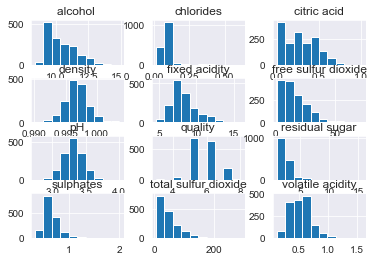

In [92]:
red.hist()
plt.savefig(r'C:\Users\Carrie Minerich\Desktop\wine\redwinehist.pdf')

Text(0, 0.5, 'Number of occurances in the 1599 row dataset')

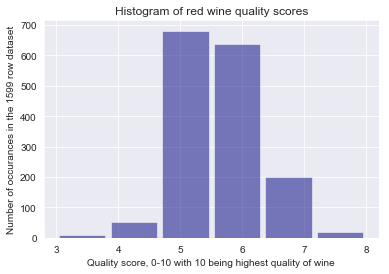

In [90]:
#histogram

plt.hist(red['quality'], bins=6, facecolor = 'navy', alpha=0.5, rwidth = 0.90)
plt.title("Histogram of red wine quality scores")
plt.xlabel("Quality score, 0-10 with 10 being highest quality of wine")
plt.ylabel("Number of occurances in the 1599 row dataset")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.


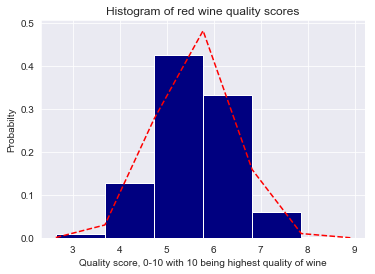

In [97]:
mu = 5.6 #mean of distribution
sigma = 0.81 #SD of quality dist
x = mu + sigma * np.random.randn(10000)

bins = 6

n, bins, patches = plt.hist(x, bins, normed=1, facecolor='navy')

#best fit line
y= mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.title("Histogram of red wine quality scores")
plt.xlabel("Quality score, 0-10 with 10 being highest quality of wine")
plt.ylabel("Probabilty")

#adjust spacing
plt.subplots_adjust(left=0.15)
plt.show()

Text(0, 0.5, 'Quantity count')

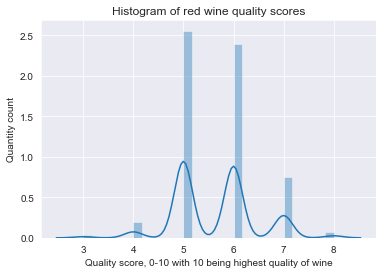

In [117]:
sns.set_style('darkgrid')
sns.distplot(red['quality'], kde=True)

plt.title("Histogram of red wine quality scores")
plt.xlabel("Quality score, 0-10 with 10 being highest quality of wine")
plt.ylabel("Quantity count")

Text(0, 0.5, 'Quantity count')

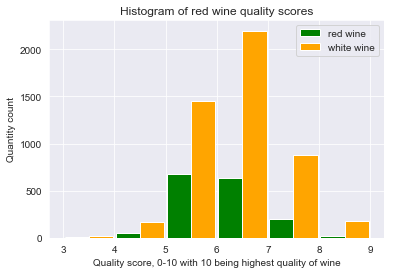

In [106]:
#keep in mind that count is different in each group
r = red['quality']
w = white['quality']

plt.hist([r, w], bins=6, rwidth=0.95, color=['green', 'orange'], label=['red wine', 'white wine'])
plt.legend()
plt.title("Histogram of red wine quality scores")
plt.xlabel("Quality score, 0-10 with 10 being highest quality of wine")
plt.ylabel("Quantity count")

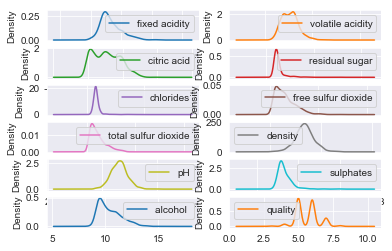

In [116]:
red.plot(kind='density', subplots=True, layout=(6,2), sharex=False)
plt.show()

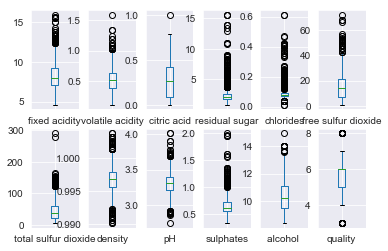

In [119]:
#box and whisker plot
red.plot(kind='box', subplots=True, layout=(2,6), sharex=False, sharey=False)
plt.show()

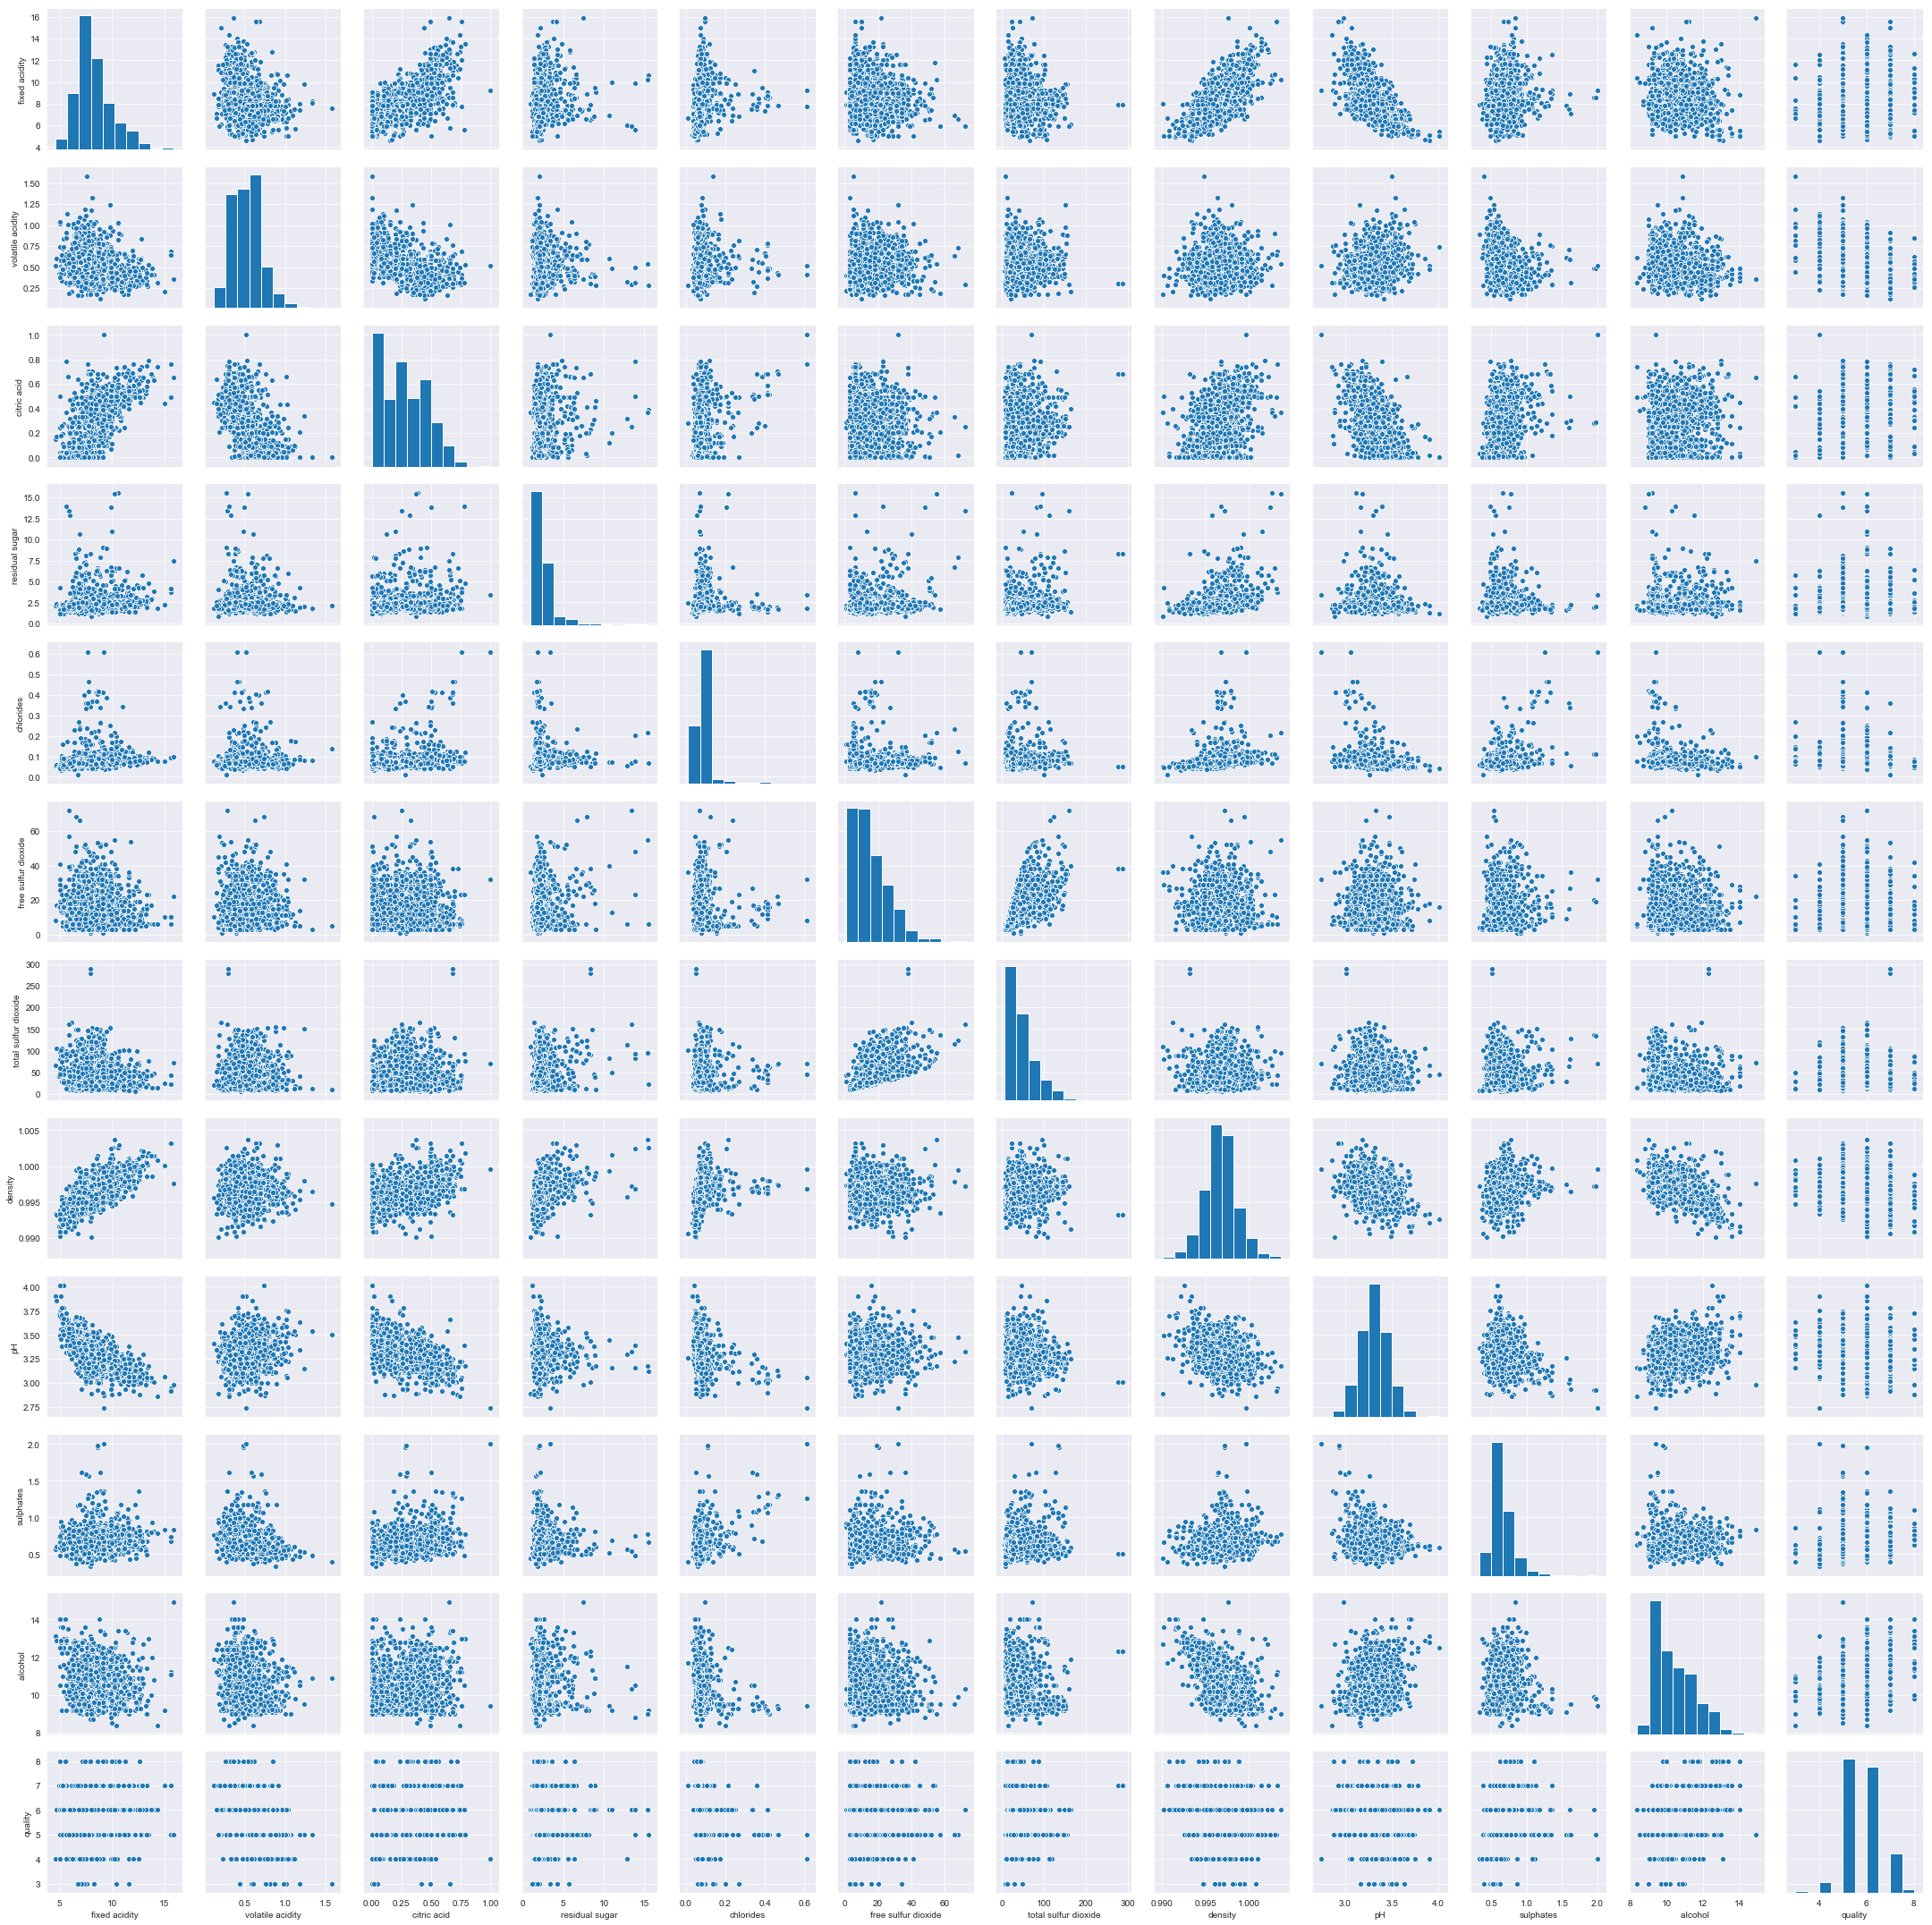

In [88]:
sns.pairplot(red)
plt.savefig(r'C:\Users\Carrie Minerich\Desktop\wine\winepairplot.pdf')

##### whisker are the spread (lowest and highest) and values fall between. Box has median and shows split of the median, or the middle value of the dataset. Q1 is from lower whisker to box.  Q2 is the median because it divides the data into two parts. Q3 is the upper whisker from the box. Outliers are shown outside the whisker and is less than Q1 or greater than Q3 by more than 1.5 times. 

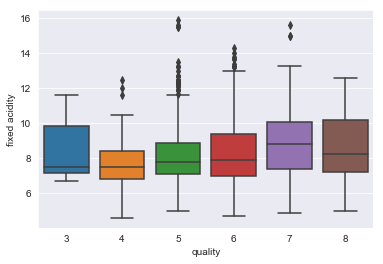

In [123]:

sns.boxplot(red['quality'], red['fixed acidity'])

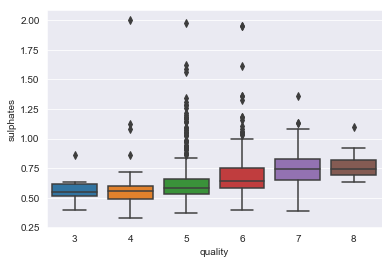

In [124]:
sns.boxplot(red['quality'], red['sulphates'])

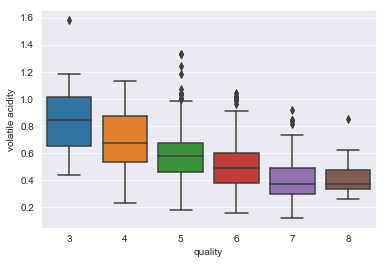

In [125]:
sns.boxplot(red['quality'], red['volatile acidity'])

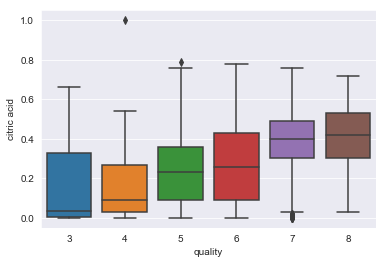

In [126]:
sns.boxplot(red['quality'], red['citric acid'])

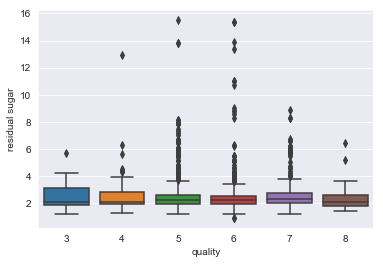

In [127]:
sns.boxplot(red['quality'], red['residual sugar'])

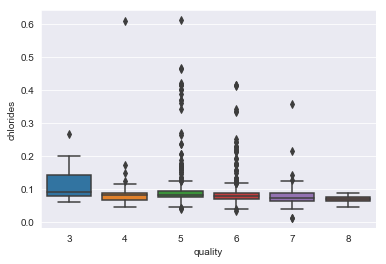

In [128]:
sns.boxplot(red['quality'], red['chlorides'])

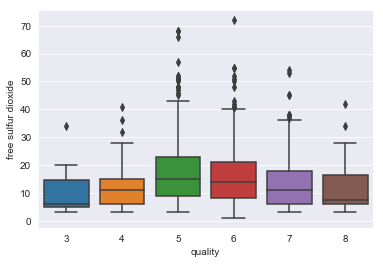

In [129]:
sns.boxplot(red['quality'], red['free sulfur dioxide'])

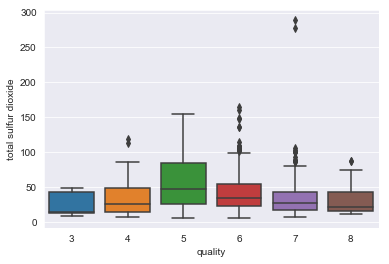

In [130]:
sns.boxplot(red['quality'], red['total sulfur dioxide'])

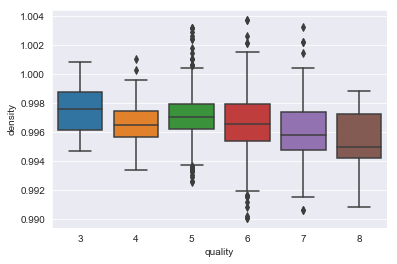

In [131]:
sns.boxplot(red['quality'], red['density'])

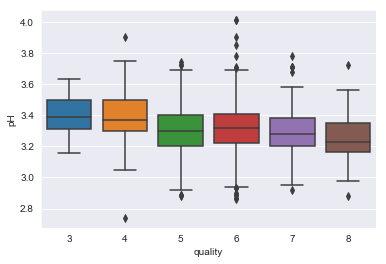

In [139]:
sns.boxplot(red['quality'], red['pH'])

##### A lot of outliers. Describe dataset. 

In [145]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.875547             46.468418     0.996747   
std       0.047065            10.460434             32.895920     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates     alcohol       quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

##### Fixed acidity, volatile acidity does not have much variance in Q1 and Q2. 
##### Residual sugar has huge jump from Q3 to max. Same with free sulfur dioxide, total sulfur dioxide. Chlorides also has a jump with Q3 and max. Sulphates have a little bit of a jump between Q3 and max but not as extreme as residual sugar or total sulfur dioxide. 
##### citric acid is somewhat uniform distributed, 

#####  1: T Test: Sulphates are often assosicated with poor wine quality. For the red wine dataset, Ha states that the higher the sulphates, the lower the quality score will be.  